In [2]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 535.7/535.7 kB 3.8 MB/s eta 0:00:00


PySoundFile failed. Trying audioread instead.
librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
PySoundFile failed. Trying audioread instead.
librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
PySoundFile failed. Trying audioread instead.
librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
PySoundFile failed. Trying audioread instead.
librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
PySoundFile failed. Trying audioread instead.
librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
PySoundFile failed. Trying audioread instead.
librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa versi

Accuracy: 0.8260869565217391


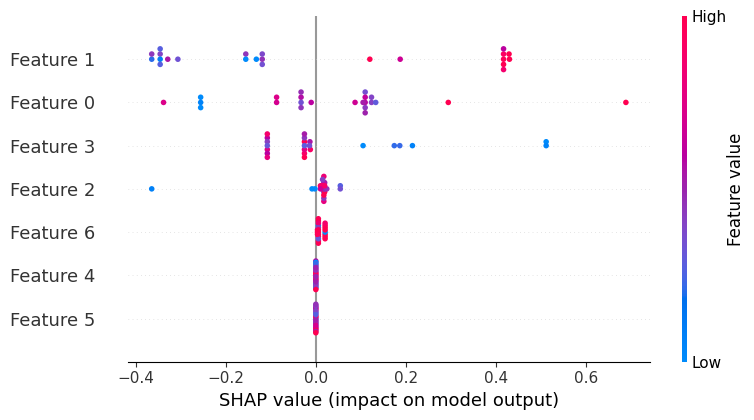

In [5]:
import librosa
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.ensemble import VotingClassifier
import os
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import StackingClassifier
import shap


def extract_audio_features(audio_file):
    # Load audio file
    y, sr = librosa.load(audio_file)

    # Extract features
    # Speech rate (number of speech segments divided by duration)
    speech_rate = len(librosa.effects.split(y)) / librosa.get_duration(y=y, sr=sr)

    # Energy
    energy = np.mean(librosa.feature.rms(y=y))
    zero_crossing_rate = np.mean(librosa.feature.zero_crossing_rate(y=y))

    # Pitch-related features
    pitches, magnitudes = librosa.piptrack(y=y, sr=sr)
    pitch_range = np.max(pitches) - np.min(pitches)

    # Spectral features
    spectral_centroid = np.mean(librosa.feature.spectral_centroid(y=y, sr=sr))
    spectral_bandwidth = np.mean(librosa.feature.spectral_bandwidth(y=y, sr=sr))
    spectral_rolloff = np.mean(librosa.feature.spectral_rolloff(y=y, sr=sr))

    # Combine features into a single feature vector
    features = [
        speech_rate,
        energy,
        spectral_centroid,
        spectral_bandwidth,
        spectral_rolloff,
        zero_crossing_rate,
        pitch_range
    ]

    return features
# Load and prepare dataset
def prepare_dataset(audio_folder_urgent, audio_folder_non_urgent):
    # Extract features from audio files in the "Urgent" folder
    audio_files_urgent = [os.path.join(audio_folder_urgent, file) for file in os.listdir(audio_folder_urgent)]
    X_urgent = np.array([extract_audio_features(audio_file) for audio_file in audio_files_urgent])
    y_urgent = np.ones(len(X_urgent))  # Label 1 for "Urgent"

    # Extract features from audio files in the "Non Urgent" folder
    audio_files_non_urgent = [os.path.join(audio_folder_non_urgent, file) for file in os.listdir(audio_folder_non_urgent)]
    X_non_urgent = np.array([extract_audio_features(audio_file) for audio_file in audio_files_non_urgent])
    y_non_urgent = np.zeros(len(X_non_urgent))  # Label 0 for "Non Urgent"

    # Combine the datasets
    X = np.concatenate((X_urgent, X_non_urgent))
    y = np.concatenate((y_urgent, y_non_urgent))

    return X, y
    # Load your dataset of urgent and not urgent voices

audio_folder_urgent = '/content/drive/MyDrive/Audio_Urgency/Urgent'
audio_folder_non_urgent = '/content/drive/MyDrive/Audio_Urgency/Not_Urgent'

# Load and prepare dataset
X, y = prepare_dataset(audio_folder_urgent, audio_folder_non_urgent)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize base classifiers
dt_classifier = DecisionTreeClassifier()
svm_classifier = SVC(kernel='rbf', probability=True)  # Use kernel SVM with probability estimates

# Initialize stacking ensemble classifier
estimators = [('decision_tree', dt_classifier), ('svm', svm_classifier)]
stacking_classifier = StackingClassifier(estimators=estimators, final_estimator=None)  # Use default final estimator

# Train the stacking ensemble model
stacking_classifier.fit(X_train, y_train)

# Evaluate the model's performance
accuracy = stacking_classifier.score(X_test, y_test)
print("Accuracy:", accuracy)

# Explain predictions using SHAP
explainer = shap.Explainer(stacking_classifier.predict, X_train)
shap_values = explainer(X_test)

# Visualize SHAP values (optional)
shap.summary_plot(shap_values, X_test)  # Provide feature names if available


PySoundFile failed. Trying audioread instead.
librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
PySoundFile failed. Trying audioread instead.
librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
PySoundFile failed. Trying audioread instead.
librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
PySoundFile failed. Trying audioread instead.
librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
PySoundFile failed. Trying audioread instead.
librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
PySoundFile failed. Trying audioread instead.
librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa versi

Accuracy: 0.8260869565217391


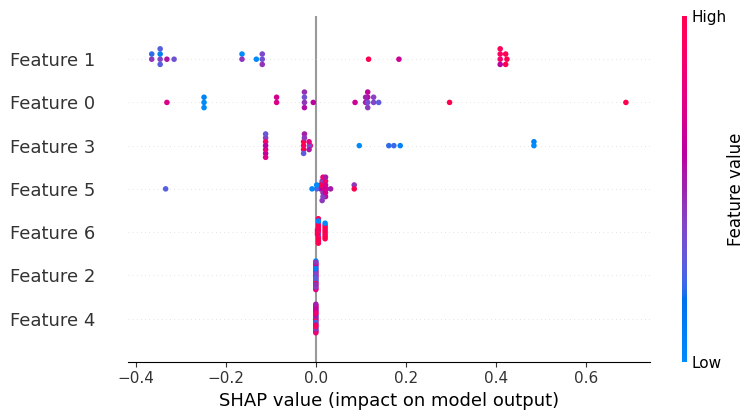

In [8]:
import librosa
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.ensemble import VotingClassifier
import os
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import StackingClassifier
import shap


def extract_audio_features(audio_file):
    # Load audio file
    y, sr = librosa.load(audio_file)

    # Extract features
    # Speech rate (number of speech segments divided by duration)
    speech_rate = len(librosa.effects.split(y)) / librosa.get_duration(y=y, sr=sr)

    # Energy
    energy = np.mean(librosa.feature.rms(y=y))
    zero_crossing_rate = np.mean(librosa.feature.zero_crossing_rate(y=y))

    # Pitch-related features
    pitches, magnitudes = librosa.piptrack(y=y, sr=sr)
    pitch_range = np.max(pitches) - np.min(pitches)

    # Spectral features
    spectral_centroid = np.mean(librosa.feature.spectral_centroid(y=y, sr=sr))
    spectral_bandwidth = np.mean(librosa.feature.spectral_bandwidth(y=y, sr=sr))
    spectral_rolloff = np.mean(librosa.feature.spectral_rolloff(y=y, sr=sr))

    # Combine features into a single feature vector
    features = [
        speech_rate,
        energy,
        spectral_centroid,
        spectral_bandwidth,
        spectral_rolloff,
        zero_crossing_rate,
        pitch_range
    ]

    return features
# Load and prepare dataset
def prepare_dataset(audio_folder_urgent, audio_folder_non_urgent):
    # Extract features from audio files in the "Urgent" folder
    audio_files_urgent = [os.path.join(audio_folder_urgent, file) for file in os.listdir(audio_folder_urgent)]
    X_urgent = np.array([extract_audio_features(audio_file) for audio_file in audio_files_urgent])
    y_urgent = np.ones(len(X_urgent))  # Label 1 for "Urgent"

    # Extract features from audio files in the "Non Urgent" folder
    audio_files_non_urgent = [os.path.join(audio_folder_non_urgent, file) for file in os.listdir(audio_folder_non_urgent)]
    X_non_urgent = np.array([extract_audio_features(audio_file) for audio_file in audio_files_non_urgent])
    y_non_urgent = np.zeros(len(X_non_urgent))  # Label 0 for "Non Urgent"

    # Combine the datasets
    X = np.concatenate((X_urgent, X_non_urgent))
    y = np.concatenate((y_urgent, y_non_urgent))

    return X, y
    # Load your dataset of urgent and not urgent voices

audio_folder_urgent = '/content/drive/MyDrive/Audio_Urgency/Urgent'
audio_folder_non_urgent = '/content/drive/MyDrive/Audio_Urgency/Not_Urgent'

# Load and prepare dataset
X, y = prepare_dataset(audio_folder_urgent, audio_folder_non_urgent)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize base classifiers
dt_classifier = DecisionTreeClassifier()
svm_classifier = SVC(kernel='rbf', probability=True)  # Use kernel SVM with probability estimates

# Initialize stacking ensemble classifier
estimators = [('decision_tree', dt_classifier), ('svm', svm_classifier)]
stacking_classifier = StackingClassifier(estimators=estimators, final_estimator=None)  # Use default final estimator

# Train the stacking ensemble model
stacking_classifier.fit(X_train, y_train)

# Evaluate the model's performance
accuracy = stacking_classifier.score(X_test, y_test)
print("Accuracy:", accuracy)

# Explain predictions using SHAP
explainer = shap.Explainer(stacking_classifier.predict, X_train)
shap_values = explainer(X_test)

# Visualize SHAP values (optional)
shap.summary_plot(shap_values, X_test)  # Provide feature names if available


In [11]:
!pip install lime

In [13]:
import librosa
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.ensemble import VotingClassifier
import os
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import StackingClassifier
import shap


def extract_audio_features(audio_file):
    # Load audio file
    y, sr = librosa.load(audio_file)

    # Extract features
    # Speech rate (number of speech segments divided by duration)
    speech_rate = len(librosa.effects.split(y)) / librosa.get_duration(y=y, sr=sr)

    # Energy
    energy = np.mean(librosa.feature.rms(y=y))
    zero_crossing_rate = np.mean(librosa.feature.zero_crossing_rate(y=y))

    # Pitch-related features
    pitches, magnitudes = librosa.piptrack(y=y, sr=sr)
    pitch_range = np.max(pitches) - np.min(pitches)

    # Spectral features
    spectral_centroid = np.mean(librosa.feature.spectral_centroid(y=y, sr=sr))
    spectral_bandwidth = np.mean(librosa.feature.spectral_bandwidth(y=y, sr=sr))
    spectral_rolloff = np.mean(librosa.feature.spectral_rolloff(y=y, sr=sr))

    # Combine features into a single feature vector
    features = [
        speech_rate,
        energy,
        spectral_centroid,
        spectral_bandwidth,
        spectral_rolloff,
        zero_crossing_rate,
        pitch_range
    ]

    return features
# Load and prepare dataset
def prepare_dataset(audio_folder_urgent, audio_folder_non_urgent):
    # Extract features from audio files in the "Urgent" folder
    audio_files_urgent = [os.path.join(audio_folder_urgent, file) for file in os.listdir(audio_folder_urgent)]
    X_urgent = np.array([extract_audio_features(audio_file) for audio_file in audio_files_urgent])
    y_urgent = np.ones(len(X_urgent))  # Label 1 for "Urgent"

    # Extract features from audio files in the "Non Urgent" folder
    audio_files_non_urgent = [os.path.join(audio_folder_non_urgent, file) for file in os.listdir(audio_folder_non_urgent)]
    X_non_urgent = np.array([extract_audio_features(audio_file) for audio_file in audio_files_non_urgent])
    y_non_urgent = np.zeros(len(X_non_urgent))  # Label 0 for "Non Urgent"

    # Combine the datasets
    X = np.concatenate((X_urgent, X_non_urgent))
    y = np.concatenate((y_urgent, y_non_urgent))

    return X, y
    # Load your dataset of urgent and not urgent voices

audio_folder_urgent = '/content/drive/MyDrive/Audio_Urgency/Urgent'
audio_folder_non_urgent = '/content/drive/MyDrive/Audio_Urgency/Not_Urgent'

# Load and prepare dataset
X, y = prepare_dataset(audio_folder_urgent, audio_folder_non_urgent)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize base classifiers
dt_classifier = DecisionTreeClassifier()
svm_classifier = SVC(kernel='rbf', probability=True)  # Use kernel SVM with probability estimates

# Initialize stacking ensemble classifier
estimators = [('decision_tree', dt_classifier), ('svm', svm_classifier)]
stacking_classifier = StackingClassifier(estimators=estimators, final_estimator=None)  # Use default final estimator

# Train the stacking ensemble model
stacking_classifier.fit(X_train, y_train)

# Evaluate the model's performance
accuracy = stacking_classifier.score(X_test, y_test)
print("Accuracy:", accuracy)

explainer = lime.lime_tabular.LimeTabularExplainer(X_train, feature_names=['speech_rate', 'energy', 'spectral_centroid', 'spectral_bandwidth', 'spectral_rolloff', 'zero_crossing_rate', 'pitch_range'], mode='classification')
for i in range(5):  # Explain predictions for first 5 samples
    explanation = explainer.explain_instance(X_test[i], stacking_classifier.predict_proba)
    print("Explanation for sample", i+1)
    explanation.show_in_notebook()


PySoundFile failed. Trying audioread instead.
librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
PySoundFile failed. Trying audioread instead.
librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
PySoundFile failed. Trying audioread instead.
librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
PySoundFile failed. Trying audioread instead.
librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
PySoundFile failed. Trying audioread instead.
librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
PySoundFile failed. Trying audioread instead.
librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa versi

Accuracy: 0.782608695652174


NameError: name 'lime' is not defined

In [18]:
!pip install scikit-learn==1.0.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.5/26.5 MB 32.5 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 0.20.1 requires scikit-learn>=1.2.2, but you have scikit-learn 1.0.2 which is incompatible.


In [1]:
import librosa
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.ensemble import VotingClassifier
import os
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

<ipython-input-21-8f4b001a333d>:16: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_file)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-21-8f4b001a333d>:16: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_file)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-21-8f4b001a333d>:16: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_file)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: Futur

Accuracy: 0.8571428571428571


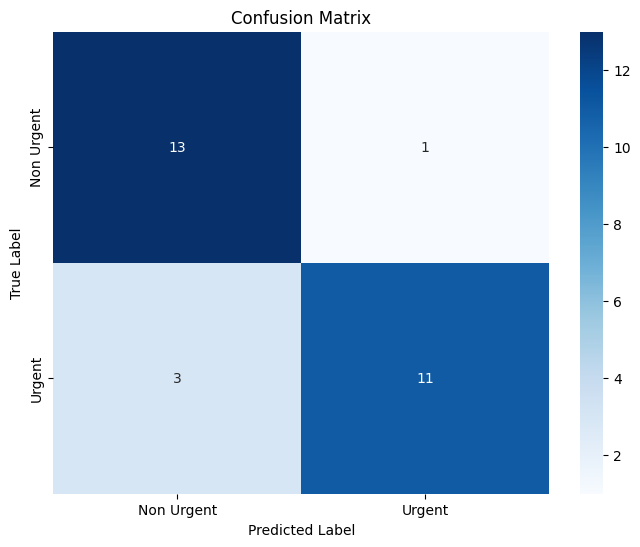

In [21]:
import librosa
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import os

def extract_audio_features(audio_file):
    # Load audio file
    y, sr = librosa.load(audio_file)

    # Extract features
    # Speech rate (number of speech segments divided by duration)
    speech_rate = len(librosa.effects.split(y)) / librosa.get_duration(y=y, sr=sr)

    # Energy
    energy = np.mean(librosa.feature.rms(y=y))

    # Zero crossing rate
    zero_crossing_rate = np.mean(librosa.feature.zero_crossing_rate(y=y))

    # Pitch-related features
    pitches, magnitudes = librosa.piptrack(y=y, sr=sr)
    pitch_range = np.max(pitches) - np.min(pitches)

    # Spectral features
    spectral_centroid = np.mean(librosa.feature.spectral_centroid(y=y, sr=sr))
    spectral_bandwidth = np.mean(librosa.feature.spectral_bandwidth(y=y, sr=sr))
    spectral_rolloff = np.mean(librosa.feature.spectral_rolloff(y=y, sr=sr))

    # Combine features into a single feature vector
    features = [
        speech_rate,
        energy,
        zero_crossing_rate,
        pitch_range,
        spectral_centroid,
        spectral_bandwidth,
        spectral_rolloff
    ]

    return features

def prepare_dataset(audio_folder_urgent, audio_folder_non_urgent):
    # Extract features from audio files in the "Urgent" folder
    audio_files_urgent = [os.path.join(audio_folder_urgent, file) for file in os.listdir(audio_folder_urgent)]
    X_urgent = np.array([extract_audio_features(audio_file) for audio_file in audio_files_urgent])
    y_urgent = np.ones(len(X_urgent))  # Label 1 for "Urgent"

    # Extract features from audio files in the "Non Urgent" folder
    audio_files_non_urgent = [os.path.join(audio_folder_non_urgent, file) for file in os.listdir(audio_folder_non_urgent)]
    X_non_urgent = np.array([extract_audio_features(audio_file) for audio_file in audio_files_non_urgent])
    y_non_urgent = np.zeros(len(X_non_urgent))  # Label 0 for "Non Urgent"

    # Combine the datasets
    X = np.concatenate((X_urgent, X_non_urgent))
    y = np.concatenate((y_urgent, y_non_urgent))

    return X, y

# Define paths to the "Urgent" and "Non Urgent" folders in your Google Drive
audio_folder_urgent = '/content/drive/MyDrive/Audio_Urgency/Urgent'
audio_folder_non_urgent = '/content/drive/MyDrive/Audio_Urgency/Not_Urgent'

# Load and prepare dataset
X, y = prepare_dataset(audio_folder_urgent, audio_folder_non_urgent)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define base classifiers
svm_classifier = SVC(kernel='rbf', C=1.0, gamma='scale', probability=True)
dt_classifier = DecisionTreeClassifier(random_state=42)

# Define meta-classifier
meta_classifier = DecisionTreeClassifier(random_state=42)

# Create stacking ensemble
ensemble_classifier = StackingClassifier(
    estimators=[
        ('svm', svm_classifier),
        ('dt', dt_classifier)
    ],
    final_estimator=meta_classifier,
    stack_method='auto'
)

# Train the stacking ensemble
ensemble_classifier.fit(X_train_scaled, y_train)

# Evaluate model performance
y_pred = ensemble_classifier.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non Urgent', 'Urgent'], yticklabels=['Non Urgent', 'Urgent'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()



PySoundFile failed. Trying audioread instead.
librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
PySoundFile failed. Trying audioread instead.
librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
PySoundFile failed. Trying audioread instead.
librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
PySoundFile failed. Trying audioread instead.
librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
PySoundFile failed. Trying audioread instead.
librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
PySoundFile failed. Trying audioread instead.
librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa versi

Accuracy: 0.782608695652174


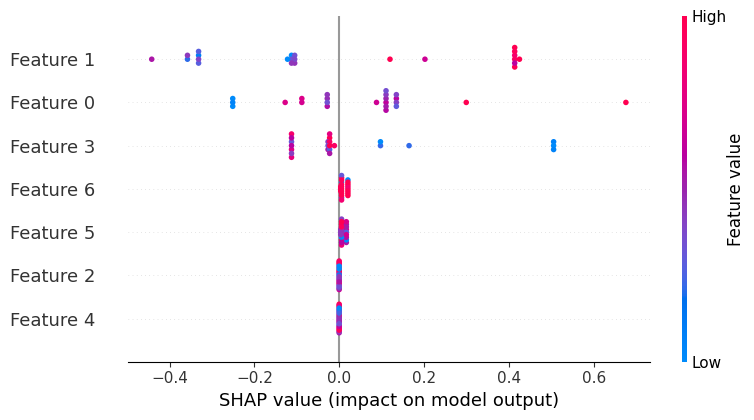

In [24]:
import librosa
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.ensemble import VotingClassifier
import os
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import StackingClassifier
import shap


def extract_audio_features(audio_file):
    # Load audio file
    y, sr = librosa.load(audio_file)

    # Extract features
    # Speech rate (number of speech segments divided by duration)
    speech_rate = len(librosa.effects.split(y)) / librosa.get_duration(y=y, sr=sr)

    # Energy
    energy = np.mean(librosa.feature.rms(y=y))
    zero_crossing_rate = np.mean(librosa.feature.zero_crossing_rate(y=y))

    # Pitch-related features
    pitches, magnitudes = librosa.piptrack(y=y, sr=sr)
    pitch_range = np.max(pitches) - np.min(pitches)

    # Spectral features
    spectral_centroid = np.mean(librosa.feature.spectral_centroid(y=y, sr=sr))
    spectral_bandwidth = np.mean(librosa.feature.spectral_bandwidth(y=y, sr=sr))
    spectral_rolloff = np.mean(librosa.feature.spectral_rolloff(y=y, sr=sr))

    # Combine features into a single feature vector
    features = [
        speech_rate,
        energy,
        spectral_centroid,
        spectral_bandwidth,
        spectral_rolloff,
        zero_crossing_rate,
        pitch_range
    ]

    return features
# Load and prepare dataset
def prepare_dataset(audio_folder_urgent, audio_folder_non_urgent):
    # Extract features from audio files in the "Urgent" folder
    audio_files_urgent = [os.path.join(audio_folder_urgent, file) for file in os.listdir(audio_folder_urgent)]
    X_urgent = np.array([extract_audio_features(audio_file) for audio_file in audio_files_urgent])
    y_urgent = np.ones(len(X_urgent))  # Label 1 for "Urgent"

    # Extract features from audio files in the "Non Urgent" folder
    audio_files_non_urgent = [os.path.join(audio_folder_non_urgent, file) for file in os.listdir(audio_folder_non_urgent)]
    X_non_urgent = np.array([extract_audio_features(audio_file) for audio_file in audio_files_non_urgent])
    y_non_urgent = np.zeros(len(X_non_urgent))  # Label 0 for "Non Urgent"

    # Combine the datasets
    X = np.concatenate((X_urgent, X_non_urgent))
    y = np.concatenate((y_urgent, y_non_urgent))

    return X, y
    # Load your dataset of urgent and not urgent voices

audio_folder_urgent = '/content/drive/MyDrive/Audio_Urgency/Urgent'
audio_folder_non_urgent = '/content/drive/MyDrive/Audio_Urgency/Not_Urgent'

# Load and prepare dataset
X, y = prepare_dataset(audio_folder_urgent, audio_folder_non_urgent)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize base classifiers
dt_classifier = DecisionTreeClassifier()
svm_classifier = SVC(kernel='rbf', probability=True)  # Use kernel SVM with probability estimates

# Initialize stacking ensemble classifier
estimators = [('decision_tree', dt_classifier), ('svm', svm_classifier)]
stacking_classifier = StackingClassifier(estimators=estimators, final_estimator=None)  # Use default final estimator

# Train the stacking ensemble model
stacking_classifier.fit(X_train, y_train)

# Evaluate the model's performance
accuracy = stacking_classifier.score(X_test, y_test)
print("Accuracy:", accuracy)

# Explain predictions using SHAP
explainer = shap.Explainer(stacking_classifier.predict, X_train)
shap_values = explainer(X_test)

# Visualize SHAP values (optional)
shap.summary_plot(shap_values, X_test)  # Provide feature names if available


# Plot the dependency plot between energy and speech_rate
#shap.dependence_plot(energy_index, shap_values, X_test, feature_names=feature_names, interaction_index=speech_rate_index)
# Find the indices of 'speech rate' and 'energy' features in the feature names list
# Show the plot


['ensemble2.pkl']

['scaler1.pkl']

Predicted Urgency Level: 0.0
